Valor w (pendiente) = [0.09183522], Valor b (intersección) = 1.2858792525736682
Valor de y =[1.74505534] para un valor de x=5
Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093
Coeficiente de Determinación R2 (score) = 0.8943593637683117


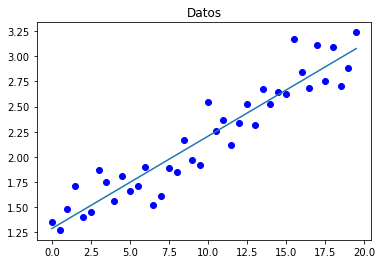

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# función f(x) = 0.1·x + 1.25 + 0.2(Ruido_Gaussiano) [ y = w·x + b ]
def f(x):  
    np.random.seed(42)
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

# generamos valores x de 0 a 20 en intervalos de 0.5
x = np.arange(0, 20, 0.5) 

# calculamos y a partir de la función que hemos generado
y = f(x)

plt.scatter(x, y, label='data', color='blue')
plt.title('Datos')

#### Hasta aqui el dibujo de la Regresión Lineal ####

# creamos una instancia de LinearRegression
regresion_lineal = LinearRegression()

# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# vemos los parámetros que ha estimado la regresión lineal
print('Valor w (pendiente) = ' + str(regresion_lineal.coef_) + ', Valor b (intersección) = ' + str(regresion_lineal.intercept_))


w = regresion_lineal.coef_      # w = pendiente
b = regresion_lineal.intercept_ # b = interseccion

# dibujamos la linea diagonal de nuestra regresión lineal
plt.plot(x, w*x + b)

# vamos a predecir y = para un valor n de x, regresion_lineal(5)
# reshape(-1,1) esto convierte la matriz en un array vertical con 1 columna
nuevo_x = np.array(5) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))

print('Valor de y =' + str(prediccion) + ' para un valor de x=5')

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# El coeficiente de determinación R2 determina la calidad del modelo 
# para replicar los resultados, y la proporción de variación de los 
# resultados que puede explicarse por el modelo

# Calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)

print('Coeficiente de Determinación R2 (score) = ' + str(r2))